# Mesure du Flux (4Ox TELEMOS)

- Utilisation de la sonde AXUV100, réglage du gain du phantom sur $10^8$ en mode **Low**
- Montage sur lamelle de quartz (ESCO), et ulisitaion du x40 sur TELEMOS (proche de la mise au point avec lame Matthieu), fentes à 0.5 (soit 0.625 sur MM), en entrée aussi
- Synchrotron: 450 Ma
- Mesures effectuées à la main avec le multimètre le 14/09/2023
- Avec le 40x de brigitte (B)

- DM347

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p

In [2]:
%mkdir data
%mkdir figures

mkdir: impossible de créer le répertoire « data »: Le fichier existe
mkdir: impossible de créer le répertoire « figures »: Le fichier existe


## Numérisation des données

In [14]:
GainPhantom = 1e-7
date = '14092023'
W = list(range(230, 340+5, 5))
V = [
    1.34e-1,
    2.15e-1,
    3.44e-1,
    5.07e-1,
    6.52e-1,
    7.7e-1,
    8.87e-1,
    1.01,
    1.12,
    1.22,
    1.28,
    1.32,
    1.31,
    1.18,
    9.8e-1,
    8.37e-1,
    7.37e-1,
    6.93e-1,
    6.54e-1,
    5.96e-1,
    5.76e-1,
    5.55e-1,
    4.97e-1
]

print(W, len(W), len(V))
data = p.DataFrame({'W (nm)': W, 
                    'V (V)': V
                   })
data.to_csv(f'./data/data_diode_TELEMOS_40x_{date}.csv')
data.head()

[230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340] 23 23


W (nm)  V (V)
0     230  0.134
1     235  0.215
2     240  0.344
3     245  0.507
4     250  0.652

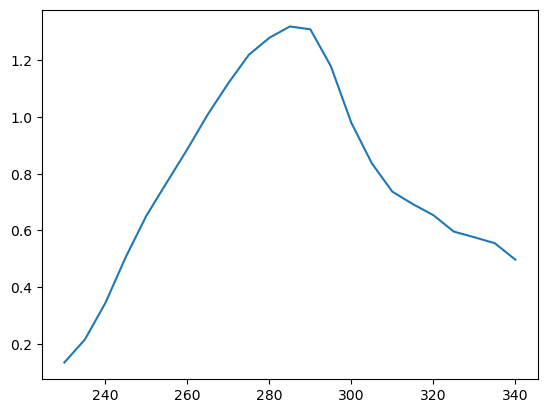

In [11]:
plt.plot(data['W (nm)'], data['V (V)'])

## Chargement des courbes de calibration de la diode

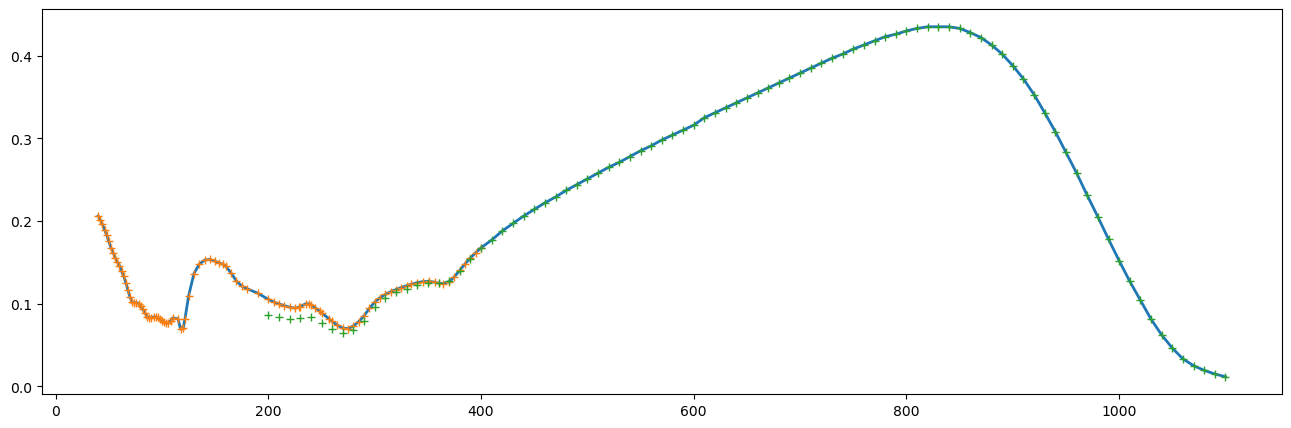

In [13]:
calibUV = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_40-400nm.csv', skiprows=4, names=('W (nm)', 'R (A/W)'))
calibVIS = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_200-1100nm.csv', skiprows=4, names=('W (nm)', 'reflectance', 'R (A/W)', 'External QR', 'Internal QE'))

# On met ensemble les deux séries on prend calibUV puis à la fin on enchaine sur calibVIS
calibMerged = p.concat((calibUV, calibVIS[calibVIS['W (nm)'] > calibUV['W (nm)'].max()]))

# Plot pour voir 
plt.figure(figsize=(16,5))
plt.plot(calibMerged['W (nm)'], calibMerged['R (A/W)'], '-', lw=2)
plt.plot(calibUV['W (nm)'], calibUV['R (A/W)'], '+')
plt.plot(calibVIS['W (nm)'], calibVIS['R (A/W)'], '+')

## Convertion des données pour avoir l'intensité, la puissance et le Flux

- Le flux de photons $\phi$ unité $\frac{photons}{s\, m^2}$ soit des photons par second métres carrés
$$ H = \phi \times \frac{hc}{\lambda}$$
Avec $H$ la puissance par mètre carré $[W/m^2]$, $h$ la constant de Plank, $c$ la célérité de la lumière, et $\lambda$ la longueur d'onde

In [15]:
# Pour avoir le courant I en ampère
data['I (A)'] = data['V (V)'] * GainPhantom

# Pour avoir la puissance (on utilise la calibration que l'on interpole lineairement au bonnes longueus d'ondes)
calib = np.interp(data['W (nm)'], calibMerged['W (nm)'], calibMerged['R (A/W)'])
data['P (W)'] = data['I (A)'] / calib

h = 6.62e-34
c = 2.99e8
data['Flux'] = ( data['P (W)'] * data['W (nm)'] * 10e-9 ) / (c*h)

data.to_csv(f'./data/data_flux_TELEMOS_40x_{date}.csv')
data

W (nm)  V (V)         I (A)         P (W)          Flux
0      230  0.134  1.340000e-08  1.390041e-07  1.615200e+12
1      235  0.215  2.150000e-08  2.154309e-07  2.557682e+12
2      240  0.344  3.440000e-08  3.485309e-07  4.225940e+12
3      245  0.507  5.070000e-08  5.380439e-07  6.659699e+12
4      250  0.652  6.520000e-08  7.334083e-07  9.263107e+12
5      255  0.770  7.700000e-08  9.200124e-07  1.185236e+13
6      260  0.887  8.870000e-08  1.128499e-06  1.482331e+13
7      265  1.010  1.010000e-07  1.367004e-06  1.830149e+13
8      270  1.120  1.120000e-07  1.595442e-06  2.176284e+13
9      275  1.220  1.220000e-07  1.747851e-06  2.428331e+13
10     280  1.280  1.280000e-07  1.751026e-06  2.476974e+13
11     285  1.320  1.320000e-07  1.685824e-06  2.427325e+13
12     290  1.310  1.310000e-07  1.533958e-06  2.247410e+13
13     295  1.180  1.180000e-07  1.251326e-06  1.864933e+13
14     300  0.980  9.800000e-08  9.626719e-07  1.459051e+13
15     305  0.837  8.370000e-08  7.800559e-07  1.201978e+13
16     310  0.737  7.370000e-08  6.627698e-07  1.037995e+13
17     315  0.693  6.930000e-08  6.057692e-07  9.640256e+12
18     320  0.654  6.540000e-08  5.584970e-07  9.029042e+12
19     325  0.596  5.960000e-08  4.987448e-07  8.189031e+12
20     330  0.576  5.760000e-08  4.732950e-07  7.890721e+12
21     335  0.555  5.550000e-08  4.487651e-07  7.595121e+12
22     340  0.497  4.970000e-08  3.963317e-07  6.807828e+12

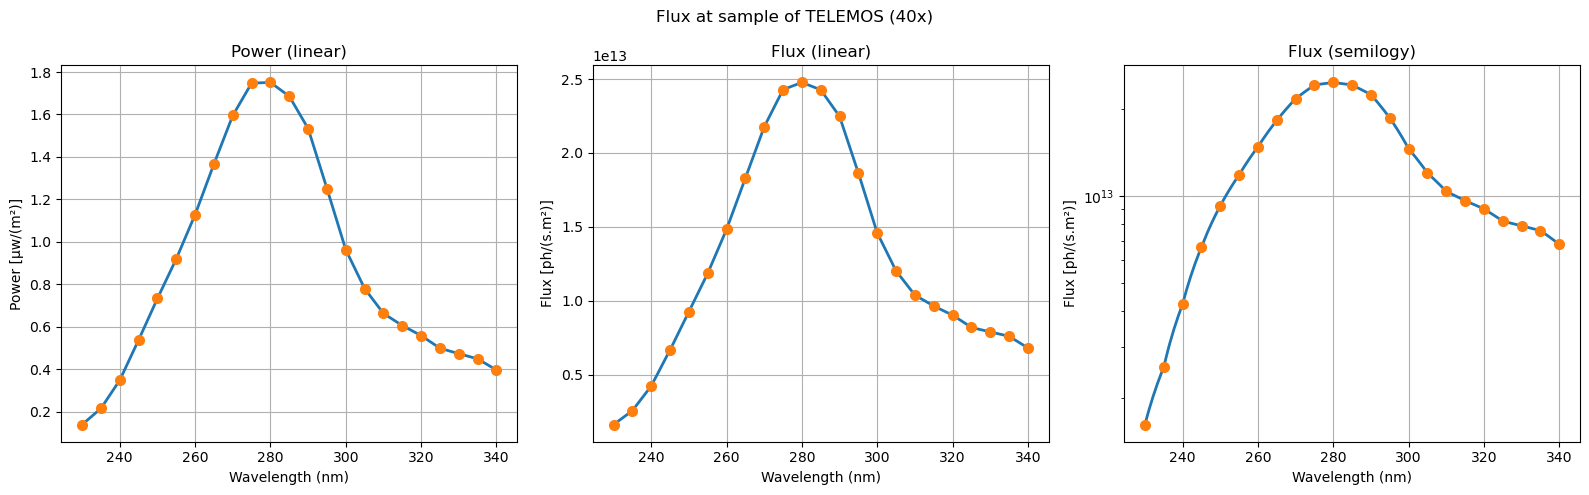

In [16]:
x = np.linspace(data['W (nm)'].min(), data['W (nm)'].max(), 200)
fit = np.interp(x, data['W (nm)'], data['Flux'])

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(data['W (nm)'], data['P (W)']*1e6, '-', lw=2)
plt.plot(data['W (nm)'], data['P (W)']*1e6, 'o', ms=7)
plt.grid()
plt.ylabel('Power [µw/(m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Power (linear)')

plt.subplot(132)
plt.plot(x, fit, lw=2)
plt.plot(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (linear)')

plt.subplot(133)
plt.semilogy(x, fit, lw=2)
plt.semilogy(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (semilogy)')

plt.suptitle('Flux at sample of TELEMOS (40x)')
plt.tight_layout()

plt.savefig(f'./figures/Flux_TELEMOS_40x_{date}.pdf')
plt.savefig(f'./figures/Flux_TELEMOS_40x_{date}.png')